<h1 align="center">Machine Learning Tutorial: Classification</h1>

### 1. What is Classification?
Classification is the problem to correctly predict the class of the given input data. Unlike the regression problem (which could predict a specifict value), the classification aims to tell which category the data belongs to.

There are generally 4 types of different classification problems:

1. Binary Classification: this could only predict the result from 2 possible classes. For example, you might want to classify an email as **spam** or **not spam** depending on the content.

2. Multi-Class Classification: this could predict the result from more than 2 possible classes. For example, you might want to know the type of fruits from **apple**, **pear**, **orange** and so on.

3. Multi-Label Classification: this could predict more than 1 labels for each data. For example, within a movie classification task, a movie might be simultaneously belongs to lots of different types of labels like **Action**, **Adventure**, **Fantasy** and you want to get 3 labels for every movie you want to predict.

4. Imbalanced Classification: this means that during training process the distribution of examples for each category is not consistent.

Within this tutorial, we will explore the binary classification deeply and help you understand more about the supervised learning and the classification.

### 2. What is Supervised Learning?
Supervised learning is the machine learning task to learn a mapping between the input featuers and the output and the goal is to ***generalise from the training data to accurately find the result for unseen data.***

Within the classification, we would like to know the relationship between the ***features*** and the ***class label***. In other words, we want to train the model so it could generally classify ***objects with 4 wheels*** as a ***car.***

### 3. Preparation

#### 3.1 Training, Validation and Test Sets (Very Important!!!) (You could skip this part if you have seen this in other tutorials)
As we have seen, the reason why machine learning algorithms could have this fancy performance is that generally they use a very large amount of data to "learn" how to solve the problem.

Within this "learning" process, we could divide data into training, validation adn test datasets for different purpose:

1. Training set ***(could "see", could "use" in the training)***: The model could access to this dataset to optimise the weights and do calculations in the training.

2. Validation set ***(could "see", can't "use" in the training)***: During the training, the model could only use the validation set to determine how good it could perform.

3. Test set: ***(can't "see", can't "use" in the training)***: After training, the model could use the test set to determine how good it could perform on unseen data.

The validation set and test set are very similar as they are both used for evaluating the accuracy of the model. However, the key difference is that (very important!!!):

1. ***Validation set could be used during the training process, which means you could observe the loss information and tune the hyperparameters but can't use it for optimisation and calculation.***

2. ***Test set could only be used after the training is finished. It is used to check how the model could perform on absolutely unseen data. In other words, you can't do any modification to the model once you use the test set.***

#### 3.2 Linear Classifier (Binary)
Let's consider the below graph:

1. This is a 2D feature space, which means that each point within this space has 2 features, $x_1$ and $x_2$.

2. Within our case, we could simply define $y=sign(\theta\cdot x)$, which could output $1$ if the dot product between the model weight $\theta$ and the input data $x$ is positive. Otherwise it could output $-1$ if the dot product is negative.

3. Graphically, the model could be represented as the $\theta$ vector and we define the ***decision boundary*** as ***the line perpendicular to that vector***. If the input data falls into the purple area (in which the dot product is always greater than 0), it is classified to be ***class A***. The same principle could be applied to the blue area, where points are classified as ***class B***.

5. By adjusting the model weight $\theta$, we are actually changing the gradient of the decision boundary. By allowing the offset $\theta _0$, we could modify the intercept of the decision boundary.

6. If the dot product is 0, which means that the point lies exactly on the decision boundary, we can't give it a valid class.

We will come back to the margin boundary later.

![Binary Classification](https://miro.medium.com/max/1400/1*sfqR-rZSYaITJ5_PbXU_9w.png)

#### 3.3 Classification Error
We could use the classification erro to determine how good our classifier could perform.

This is simply defined as ***the ratio between the number of wrong predictions and the number of total preditions***.

#### 3.4 Perceptron Algorithm
##### 3.4.1 Matrix Definition
Before we dive into the perceptron algorithm, let us express our problem in the matrix form, which could be calculated efficiently.

Within the linear classification problem (binary), we have the following components:

1. N different labels as a (N,1) matrix Y where each label could only be chosen from {-1, 1}

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}$$

2. N different x values with d features as a (N,d+1) matrix $X$

$$\begin{bmatrix}
1 & x_{1,1} & x{1,2} & \dots & x_{1,d} \\
1 & x_{2,1} & x{2,2} & \dots & x_{2,d} \\
\vdots & \vdots & \vdots & \dots & \vdots \\
1 & x_{N,1} & x{N,2} & \dots & x_{N,d} \\
\end{bmatrix}$$

we use $x_i$ to represent the $i^{th}$ row of this matrix, which is a (1, d+1) vector.

3. $\theta$ as (d+1, 1) matrix

$$\begin{bmatrix} \theta _0 \\ \theta _1 \\ \vdots \\ \theta _N \end{bmatrix}$$

##### 3.4.2 Detailed Algorithm
The whole algorithm contains the following steps:

1. Initialise our $\theta$ as a vector full of 0.

2. Use every point in the training set from 1 to N:

    a. Check whether the classifier could give a correct prediction for the point i by determing $y_i(\theta\cdot x_i)\leqslant 0$ (If the prediction is inconsistent with the label, their product must be negative)

    b. If it is incorrect, update the model by using $\theta _{new}=\theta + y_ix_i^T$

3. Repeat the step 2 until reaching the maximum number of epoch.

It could be seen from the above that this is a very simple algorithm and the core idea is that ***only updating the model awhen it can't give a corret prediction.***

##### 3.4.3 Model Update
You might wonder why we use $\theta _{new}=\theta + y_ix_i^T$ to update the model and whether it is efficient.

Before updating, we have $y_i(\theta\cdot x_i)$

After updating, we have $y_i(\theta _{new}\cdot x_i)=y_i[(\theta + y_ix_i^T)\cdot x_i]$

If we calculate the difference between the updated value and the original value, we could get $y_i[(\theta + y_ix_i^T)\cdot x_i]-y_i(\theta\cdot x_i)=y_i^2\lVert x_i \rVert^2 >0$

This means that our updated model could always have a greater chance to pass the check and make the prediction and true label consistent.

#### 3.5 Support Vector Machine

##### 3.5.1 Distance between a Point and a Line
Before we talk about the margin and the margin boundary, let us revise the equation for calculating the distance between a point and a line.

If we have a line $\theta\cdot x=0$ and an arbitrary point $x_0$, the distance between them is $\frac{\left\lvert \theta\cdot x_0 \right\rvert}{\lVert \theta \rVert}$

##### 3.5.2 Margin and Margin Boundary
Let's check the following graph.

You might notice that you could find lots of decision boundary that could perfectly classify those "+" and "-" points. But is there a best one we could get?

Here, we define:

1. Support Vector: the point within the class that is the closest to the decision boundary

2. Margin: the distance between the support vector and the decision boundary

3. Margin Boundary: the straight line that is parallel to the decision boundary and the distance between them is the margin

If the margin of a decision boundary is greater, that means it has a greater strength to classfy those points and generally could do better when predicting unseen data.

This means that **by introducing the margin and margin boundary, it could improve the generalisation of the classifier so it has a greater potential to perform well on any unseen data.***

The margin of a decision boundary is mathematically defined as $d_{sv}=\frac{y_{sv}\theta\cdot x_{sv}}{\lVert \theta \rVert}$ where $x_{sv}$ represents the support vector and $y_{sv}$ represents the corresponding class label.

However, our $\theta$ is highly scalable as we are only interested in the sign of the product. To simplify our calculation, we aim to find the $\theta$ that could make $y_{sv}\theta\cdot x_{sv}=1$.

By doing this, our margin could be finally expressed as $d_{sv}=\frac{1}{\lVert \theta \rVert}$

![Binary Classification](https://uk.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1630399098268.jpg)

##### 3.5.3 Hinge Loss and Objective Function
After introducing the concept of margin, our objective has changed to ***train a model with a high accuracy while keeping the maximum margin at the same time.***

To achieve this goal, we will use a different loss function, hinge loss.

The hinge loss is defined as $Hinge(\gamma _i)=0$ if $\gamma _i\geqslant 1$ and $Hinge(\gamma _i)=1-\gamma _i$ if $\gamma _i<1$ where $\gamma _i=d_{i}/d_{sv}$, the ratio between the distance from point i to the decision boundary and the margin.

It would be easier to think about this in 2 directions:

1. If a point could be correctly classified and the distance is greater than the margin, we don't update the model.

2. If a point exceeds the margin or it couldn't be correctly classified, we update the model depending on its position.

By using the definition of the margin, it is obvious that $\gamma _i=\frac{y_i\theta\cdot x_i}{\lVert \theta \rVert}\cdot\lVert \theta \rVert=y_i\theta\cdot x_i$

##### 3.5.4 Empirical Risk (You could skip this part if you have seen this in other tutorials)
Although we could train our model to work well on our training/validation sets, we absolutely have no idea how it could perform on the real unseen data.

To tackle this problem, we have to use the principle of empirical risk minimisation here.

Empirical risk could estimate how the model might perform on the unseen data using the accuracy on the observed dataset.

Empirical risk is mathematically defined as: $R(model)=\frac{1}{N}\sum_{i=1}^{N} Loss(y_i , model(x_i))$

Within our case, the empirical risk could be represented as $R(\theta)=\frac{1}{N}\sum_{i=1}^{N} Hinge(y_i\theta\cdot x_i)$

##### 3.5.5 Regularisation (You could skip this part if you have seen this in other tutorials)
Regularisation could be considered as a resistance for model to perfectly fit the training data.

If our model could perfectly fit the training data (very low training loss), this means that it could also fit the noise within the training set very well and generally can't predict the result for unseen data.

By adding the regularisation term, only a very big change could update the model, which makes it more robust and stable.

Within this tutorial, we will focus on the L2 Regularisation.

##### 3.5.6 Objective Function
Our final objective function is defined as $J_ {\lambda, N}(\theta)=R(\theta)+\frac{\lambda}{2} \lVert \theta \rVert_2^2=\frac{1}{N}\sum_{i=1}^{N} Hinge(y_i\theta\cdot x_i)+\frac{\lambda}{2}\sum_{i=0}^N \theta _i ^2 $

The first term is the average loss term, which could train the model to get a high accuracy.

The second term is the regularisation term, which could improve the generalisation of the model and perform well on unseen data.

The hyperparameter $\lambda$ is the regularisation coefficient, which could balance the above effects.

##### 3.5.7 Gradient Descent: Concept (Very Important!!!) (You could skip this part if you have seen it in other tutorials)
Gradient descent is a very efficient and powerful method used during the optimisation in the machine learning algorithm.

The goal of optimisation is ***to find the local minimum (global minimum if you are super lucky) of the loss function to get a more accurate model***.

Imagine you are on a mountain and you want to go back to the bottom of the mountain. Here is a list of what you might do:

1. Find the path pointing downwards, which is the inverse way of the path you climbed up ***(Find the negative of the gradient of the loss function at the certain point).***

2. Go down towards the buttom by one step ***(Update the loss by using multiplying the negative gradient and the learning rate).***

3. Repeat step 1 and 2 until you reach the buttom ***(For each epoch, find the new gradient and update the loss using that).***

We will explain this more in the gradient-based method part later.

![Gradient Descent](https://miro.medium.com/max/1400/1*G1v2WBigWmNzoMuKOYQV_g.png "Gradient Descent")

##### 3.5.8 Gradient Descent Based Method
We could use gradient descent based method instead as it could save a lot of time while keeping a relatively high accuracy.

The gradient descent based method contains the following main steps:

1. Initialise our $\theta$ as a vector full of 0.

2. Use every point in the training set from 1 to N:

    a. Check the sign of $Hinge(y_i\theta\cdot x_i)$

    b. Update the model according to the result of step 2(a)

3. Repeat the step 2 until reaching the maximum number of epoch.

##### 3.5.9 Detailed Gradient Descent Method Analysis
The general equation to optimize the model is: $\theta=\theta - rate\cdot\nabla _\theta R(\theta)$

Our objective function is:  $J_ {\lambda, N}(\theta)=R(\theta)+\frac{\lambda}{2} \lVert \theta \rVert_2^2=\frac{1}{N}\sum_{i=1}^{N} Hinge(y_i\theta\cdot x_i)+\frac{\lambda}{2}\sum_{i=0}^N \theta _i ^2 $

Theoretically, we need to use the entire dataset to compute gradient accurately and optimize the model. However, this could be painful if we have lots of data.

Alternatively, we could estimate the gradient by calculating the accurate gradient at a specific randomly chosen point, which is known as stochastic gradient descent (SGD).

This method could significantly decrease the computational cost and it makes lots of machine learning and deep learning algrotihms powerful.

If we use SGD, our objective function is simplified into $Hinge(y_i\theta\cdot x_i)+\frac{\lambda}{2}\sum_{i=0}^N \theta _i ^2 $

The first derivative of hinge loss with respect to $\theta$ is:

1. 0 if the hinge loss is less than or equal to 0

2. $-y_ix_i^T$ if the hinge loss is greater than 0

So the first derivate of the simplified objective function with respect to $\theta$ is: 

1. $\lambda\theta$ if the hinge loss is less than or equal to 0

2. $\lambda\theta - y_ix_i^T$ if the hinge loss is greater than 0

Thus, we could update our $\theta$ according to the hinge loss:

1. $\theta _{new}=\theta-rate\cdot\lambda\theta$ if the hinge loss is less than or equal to 0

2. $\theta _{new}=\theta-rate\cdot\lambda\theta+ y_ix_i^T$ if the hinge loss is greater than 0

The biggest difference between the perceptron algorithm and the SVM algorithm is that ***the SVM algorithm will still update the model even it could correctly classify the current point.***

#### 3.6 Non-Linear Classification
We have seen some efficient algorithms for solving the linear classification problems. However, there are still lots of difficult tasks that those algorithms are not able to solve.

Luckily, we could extend those algorithms to non-linear cases by introducing a higher feature space and using the kernel trick.

##### 3.6.1 Feature Space
The easiest way to extend to the non-linear cases is to add more features to each point in the dataset. Generally, the resulted feautre space is much higher than the original feature space.

Let's check the following plot:

1. Originally we have 1-D data point: $x_i=[x]$ and they are not linearly separable in the 1-D feature space. This means that you can't find a point as the decision boundary which could perfectly classify all data points without error.

2. If we simply extend those points into 2-D feature space by adding a feature $x_i=[x, x^2]$, they could be very easily linearly separated in the new feature space! This is equivalent to ***each data point could provide more information to the model so they could be more easily classified.***

Alongside this, you have lots of choices for those new features, which makes the decision boundary much more flexible. But more importantly, ***finding a non-linear decision boundary in the original feature space is equivalent to finding a linear decision boundary in the higher order feature space so our linear classification algorithms could still be used here!***

![featureExtension](https://lh6.googleusercontent.com/ioIfK_hzhstoNi2gMnIkB5jKDtVoUNthKPpRDqKyn_5fDt58pPfSA17E5SgQok2XYkYjc93VRL7FHNVFMz8Gis7ILOvnsdF9Mr52D4xQ_J2ekTmHd3VJC6SfbtI0gGll6ldmoBM)

##### 3.6.2 Kernel Trick
Extending to a much higher feature space also means that the computational cost would be much higher.

To solve this problem, we introduce the kernel trick here which doesn't require the exact feature mapping and in turn save lots of space and time.

Assume we have an originally 2-D data point and we extend it using a 2-D polynormial feature transform, this could be represented as:

$x_{old}=[x_1, x_2]$ is transformed to $x_{new}=[x_1, x_2, x_1^2, \sqrt 2x_1x_2, x_2^2]$

Let's compute the dot product $a_{new}\cdot b_{new}=(a_1b_1+a_2b_2)+(a_1^2b_1^2+2a_1a_2b_1b_2+a_2^2b_2^2)=(a_1b_1+a_2b_2)+(a_1b_1+a_2b_2)^2=a_{old}\cdot b_{old}+(a_{old}\cdot b_{old})^2$

This means that we could always find a relationship $f()$ such that $a_{new}\cdot b_{new}=f(a_{old}\cdot b_{old})$

This is very convinient as you don't have to physically construct a high-order vector and do computationally expensive calculations but still enjoy the advantage (making the non-linear classifier possible).

Such a relationship between the old and new dot product is called the ***kernel function***.

In real life, we commonly use polynomial kernel function, Gaussian RBF kernel function, Sigmoid kernel function and so on. The general rule to choose the kernel function is ***always try the simplest one first and the Gaussian RBF kernel could generally perform well.***

#### 3.7 Kernel Perceptron Algorithm
##### 3.7.1 Apply Feature Transform
By applying what we have seen so far, we could easily modify the perceptron algorithm and extend it into the kernel perceptron algorithm.

Let's recall from the original perceptron algorithm first:

1. Initialise our $\theta$ as a vector full of 0.

2. Use every point in the training set from 1 to N:

    a. Check whether the classifier could give a correct prediction for the point i by determing $y_i(\theta\cdot x_i)\leqslant 0$

    b. If it is incorrect, update the model by using $\theta _{new}=\theta + y_ix_i^T$

3. Repeat the step 2 until reaching the maximum number of epoch.

If we define our higher feature transform as $\phi()$, our perceptron algorithm could be easily extended to:

1. Initialise our $\theta$ as a vector full of 0.

2. Use every point in the training set from 1 to N:

    a. Check whether the classifier could give a correct prediction for the point i by determing $y_i\theta\cdot \phi(x_i)\leqslant 0$
    
    b. If it is incorrect, update the model by using $\theta _{new}=\theta + y_i\phi(x_i^T)$

3. Repeat the step 2 until reaching the maximum number of epoch.

##### 3.7.2 Apply Kernel Trick
If we look at the above modified algorithm, we could easily spot the truth that: $\theta _{final}=integer*y_i\phi(x_i^T)$ where this integer is the total number of update using the data point i during the whole training process.

Consider a simple case where we only have 1 data point in the training set and we update the model using this point every epoch within the total 10 epochs. This means that $\theta _{final}=10*y\phi(x^T)$

According to this fact, we could define our model in a new way:

1. We could record the number of update the model is updated by using this point within the whole training process as $\alpha$

2. So our new model could be represented as $\theta _{final}=\sum_{j=1}^{N} \alpha _jy_j\phi(x_j^T)$, which is simply the sum of all update using all points.

3. Finally, $\theta\cdot \phi(x_i)=\sum_{j=1}^{N} \alpha _jy_j\phi(x_j^T)\cdot \phi(x_i)=\sum_{j=1}^{N} \alpha _jy_j Kernel(x_j, x_i)$

##### 3.7.3 Final Result
So, we could have our kernel perceptron algorithm:

1. Initialise our $\theta$ as a vector full of 0. 

2. Initialise the number of update for each point $(\alpha _1, \alpha _2, \cdots, \alpha _N)$ all as 0.

2. Use every point in the training set from 1 to N:

    a. Check whether the classifier could give a correct prediction for the point i by determing $y_i\sum_{j=1}^{N} \alpha _jy_j Kernel(x_j, x_i)\leqslant 0$

    b. If it is incorrect, update the model by using $\alpha _i=\alpha _i+1$

3. Repeat the step 2 until reaching the maximum number of epoch.

Scikit-learn is a very popular API for machine learning in Python. It contains lots of convinient functions to help us build our own pipeline.

Within this tutorial, we will implement the original perceptron algorithm, the SVM and the kernel perceptron algorithm from scratch and using scikit-learn.

### 4. Perceptron Algorithm from Scratch

#### 4.1 Dataset Loading
Before we dive into the specific algorithm, let's first load the dataset we are going to use.

The dataset we use in this tutorial is the breast cancer wisconsin dataset, which is a very classic and easy binary classification dataset.

This dataset contains 569 tumors in total and each tumor contains 30 different features.

Every tumor could be either classified as "Maglignant" or "Benign".

For more information about those tumor features, please check: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [63]:
from sklearn.datasets import load_breast_cancer

def loadBreastCancer():
    '''
       Load the breast cancer dataset and return points
    and labels separately
 
    Return:
        dataset: np.ndarray, all tumors with 30 features, (the number of tumors, the number of features for each tumor)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
    '''
    # load_breast_cancer() could directly load the dataset into the required form
    # For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
    dataset, label=load_breast_cancer(return_X_y=True)
    
    # Here we reshape the label so it is a 2D array instead of 1D
    # np.reshape() could be used to change the shape of the array
    # "-1" means to be calculated by the parameter at this position is calculated automatically
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
    return dataset, label.reshape(-1 ,1)

dataset, label=loadBreastCancer()
print(f"There are {dataset.shape[0]} tumors within the dataset and each tumor has {dataset.shape[1]} features.")
print(f"There are also {label.shape[0]} corresponding labels.")

There are 569 tumors within the dataset and each tumor has 30 features.
There are also 569 corresponding labels.


Every feature within the dataset has its own scale (minimum and maximum value), this would cause a serious problem in our later training process.

One very efficient and important pre-processing is to scale those features to zero-mean with unit variance.

This could be simply achieved by using the StandardScaler.

In [64]:
from sklearn.preprocessing import StandardScaler

def standardScale(dataset):
    '''
        Scale down the dataset so they share the same scale

        For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    
    Argument:
        dataset: np.ndarray, all tumors with 30 features, (the number of tumors, the number of features for each tumor)

    Return:
        result: np.ndarray, the scaled dataset, (the number of tumors, the number of features for each tumor)
    '''
    scaler=StandardScaler()
    return scaler.fit_transform(dataset)

dataset, label=loadBreastCancer()
scaledDataset=standardScale(dataset)
print("The original first point in the dataset is:")
print(dataset[:1])
print("-----------------------------------------------------------------------")
print("The scaled first point in the dataset is:")
print(scaledDataset[:1])

The original first point in the dataset is:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]]
-----------------------------------------------------------------------
The scaled first point in the dataset is:
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]


Also as mentioned in the section 3.4.1, our previous analysis and conclusion are only valid when the label is chosen from {-1, 1}.

So we need to modify the loaded label and repalce every 0 with -1 so they could be used for those hand-written algorithms later.

In [65]:
import numpy as np

def modifyLabel(label):
    '''
        Modify the label by replacing every 0 with -1
    
    Argument:
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
    
    Return:
        result: np.ndarray, the modified labels containing only -1 and 1, (the number of tumors, 1)
    '''
    # np.copy() could be used to deeply copy an array, instead of just the memory address
    # Here we do want to keep the original label
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.copy.html
    result=np.copy(label)
    # This magic indexing allows us to easily find every index corresponding to "0" and assign it to "-1"
    result[result==0]=-1
    return result

Finally, we need to insert a column of "1" at the beginning of dataset to change its shape into (N, d+1).

In [66]:
import numpy as np

def addColumn(dataset):
    '''
        Add a column of "1" to the beginning of the dataset
    to change the shape into (N, d+1)

    Argument:
        dataset: np.ndarray, all tumors with 30 features, (the number of tumors, the number of features for each tumor)
    
    Return:
        result: np.ndarray, dataset with an extra column, (the number of tumors, the number of features for each tumor+1)
    '''
    # np.ones() could be used to construct an array full of 1 with the given shape
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.ones.html
    column=np.ones((1, dataset.shape[0]))
    
    # np.insert() could be used to insert the column at the specific position
    # obj=0 means we want to insert at the index 0
    # axis=1 means we want to insert a column
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.insert.html?highlight=insert#numpy.insert
    return np.insert(dataset, 0, column, axis=1)

dataset, label=loadBreastCancer()
modifiedDataset=addColumn(dataset)
print(f"After modification, there are {modifiedDataset.shape[0]} tumors now and each tumor has {modifiedDataset.shape[1]} features.")
print(f"The first feature value of the tumor is: {modifiedDataset[0][0]}")

After modification, there are 569 tumors now and each tumor has 31 features.
The first feature value of the tumor is: 1.0


#### 4.2 Zero Initialisation
We need to initialise our $\theta$ matrix, which is full of 0 with shape (d+1, 1)

However, this function could also be used to initialise the number of update for each point, which is full of 0 with shape (N, 1)

In [67]:
def initialiseZero(number):
    '''
        Initialise and return the theta matrix according to the shape of the dataset
    
        This could be used for:
        1. weight initialisation, (the number of features for each tumor+1, 1)
        2. alpha initialisation, (the number of tumors, 1)

    Argument:
        number: int, determines the number of 0s in the result
    
    Return:
        result: np.ndarray, full of 0, (number, 1)
    '''
    # np.zeros could be used to construct an array full of 0 with the given shape
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html?highlight=zeros#numpy.zeros
    return np.zeros((number, 1))

dataset, label=loadBreastCancer()
modifiedDataset=addColumn(dataset)
theta=initialiseZero(modifiedDataset.shape[1])
print(f"The shape of the initial theta is: {theta.shape}")

The shape of the initial theta is: (31, 1)


#### 4.3 Check Condition
We could use $y_i(\theta\cdot x_i)\leqslant 0$ to check whether the classifier could correctly classify the point i.

This condition is true if the prediciton is false.


In [68]:
import numpy as np

def predict(point, theta):
    '''
        Find the prediction by taking the sign of the dot product
    between the point and the theta

    Argument:
        point: np.ndarray, arbitrary number of tumors, (arbitrary number, the number of features for each tumor+1)
        theta: np.ndarray, represents the classifier, (the number of features for each tumor+1, 1)

    Return:
        result: np.ndarray, the corresponding prediction, (arbitrary number, 1)
    '''
    # np.dot() could be used to find the dot product for 1-D input and matrix multiplication for 2-D input
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.dot.html
    prediction=np.dot(point, theta)
    # np.sign() could be used to find the sign of each value
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.sign.html
    return np.sign(prediction)

def checkPrediction(point, label, theta):
    '''
        Check whether the classifier could correctly classify
    the given point in the perceptron algorithm

    Argument:
        point: np.ndarray, the tumor, (1, the number of features for each tumor+1)
        label: int, the corresponding label of the tumor, either -1 or 1
        theta: np.ndarray, represents the classifier in the perceptron algorithm, (the number of features for each tumor+1, 1)
    
    Return:
        result: boolean, True if the classifier could give a correct prediction, False otherwise
    '''
    prediction=predict(point, theta)
    
    # Here we strictly want to return a boolean type object
    if label*prediction>0:
        return True
    else:
        return False

#### 4.4 Model Update
We could update the $\theta$ by using $\theta _{new}=\theta + y_ix_i^T$ if the classifier gives a wrong prediction for the point i.

In [69]:
import numpy as np

def updateThetaPerceptron(point, label, theta):
    '''
        Update the theta by using the point and the label
    
    Argument:
        point: np.ndarray, the tumor, (1, the number of features for each tumor+1)
        label: int, the corresponding label of the tumor, either -1 or 1
        theta: np.ndarray, represents the classifier in the perceptron algorithm, (the number of features for each tumor+1, 1)
    
    Return:
        result: np.ndarray, udpated theta, (the number of features for each tumor+1, 1)
    '''
    return theta+label*point.reshape(-1, 1)

#### 4.5 Classification Error
The classification error is simply the ratio between ***the number of wrong predictions*** and ***the total number of predictions***.


In [70]:
def evaluate(prediction, label, name):
    '''
        Evaluate and report the classification error by using the prediction and
    the truth label

    Argument:
        prediction: np.ndarray, the prediction by the classifier, (arbitrary number, 1)
        label: np.ndarray, the corresponding truth label, (arbitrary number, 1)
        name: string, the name of the algorithm
    '''
    # Append 1 if the prediction for point i is wrong, 0 if it is right
    # By doing this, we could find the number of wrong predictions        
    result=[0 if prediction[i]*label[i]>0 else 1 for i in range(prediction.shape[0])]    
    error=sum(result)/prediction.shape[0]
    
    print(f"The {name} algorithm got classification error: {error}")

#### 4.6 Final Implementation
For now, we are ready to implement the perceptron algorithm by ourselves.

Recalling from the section 3.4.2, the algorithm contains the following steps:

1. Initialise our $\theta$ as a vector full of 0.

2. Use every point in the training set from 1 to N:

    a. Check whether the classifier could give a correct prediction for the point i by determing $y_i(\theta\cdot x_i)\leqslant 0$ (If the prediction is inconsistent with the label, their product must be negative)

    b. If it is incorrect, update the model by using $\theta _{new}=\theta + y_ix_i^T$

3. Repeat the step 2 until reaching the maximum number of epoch.

In [71]:
def perceptron(dataset, label, epoch):
    '''
        Use the perceptron algorithm to find the classifier
    that could solve the linear binary classification problems

    Argument:
        dataset: np.ndarray, all tumors with 30 features, (the number of tumors, the number of features for each tumor+1)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
        epoch: int, the maximum number of repeats to run
    '''
    # Initialise the theta (full of 0)
    theta=initialiseZero(dataset.shape[1])
    # Repeat the calculation until reaching the maximum number of epoch
    for i in range(epoch):
        # Go through every point in the dataset
        for j in range(dataset.shape[0]):
            point=dataset[j].reshape(1, -1)
            trueLabel=label[j]

            # Check whether the classifier could give a corret prediction
            if checkPrediction(point, trueLabel, theta) is not True:
                # Update the current theta using the current point
                theta=updateThetaPerceptron(point, trueLabel, theta)
    
    # Use the final theta to find the prediction for the whole dataset
    prediction=predict(dataset, theta)
    # Evaluate the classification error
    evaluate(prediction, label, "perceptron from scratch")
    # Compare the prediction with the original label
    compare(dataset[:, 1:3], prediction, label, "Perceptron from Scratch")

Before we train our classifier, we could build a simple function to plot the prediction and the original label for better comparison.

The algorithm works too good when using all features and the difference and improvement would be very hard to notice.

Also, we can't plot generate a plot in the 30-D feature space directly, so we will use the first 2 features only and plot all points in a 2-D feature space.

Those features used are ***Tumor Radius*** and ***Tumor Texture***.

In [72]:
import matplotlib.pyplot as plt

def convertLabel(label):
    '''
        Convert the numeric label into string label with the 
    real meaning

        Within the breast cancer datasets,
        1. Every "1" represents the class "Benign"
        2. Every "0" or "-1" represents the class "Malignant"
    
    Argument:
        label: np.ndarray, contains the numeric value representing the class, (aribitrary number, 1)
    
    Return:
        result: list, contains all corresponding string value with the real meaning
    '''
    return ["Benign" if label[i]==1 else "Malignant" for i in range(label.shape[0])]

def compare(dataset, prediction, label, name):
    '''
        Plot the prediction and the original label side by side
    
    Argument:
        dataset: np.ndarray, the breast dataset with only first 2 features, (the number of tumors, 2)
        prediction: np.ndarray, the prediction by the classifier, (the number of tumors, 1)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
        name: string, the name of the algorithm
    '''
    x1=dataset[:, 0].reshape(-1, 1)
    x2=dataset[:, 1].reshape(-1, 1)

    plt.figure(figsize=(12,10))
    plt.subplot(1, 2, 1)
    plt.scatter(x1[prediction==1], x2[prediction==1], c="red", label="Benign")
    plt.scatter(x1[prediction!=1], x2[prediction!=1], c="green", label="Malignant")
    plt.title("Prediction")
    plt.xlabel("Tumor Radius")
    plt.ylabel("Tumor Texture")
    plt.legend(title="Class")

    plt.subplot(1, 2, 2)
    plt.scatter(x1[label==1], x2[label==1], c="red", label="Benign")
    plt.scatter(x1[label!=1], x2[label!=1], c="green", label="Malignant")
    plt.title("Original Label")
    plt.xlabel("Tumor Radius")
    plt.ylabel("Tumor Texture")
    plt.legend(title="Class")

    plt.suptitle(name)
    plt.show()

### 5. Perceptron Algorithm Using Sklearn
The perceptron algorithm could be easily implemented using the scikit-learn API.

In [73]:
import numpy as np

from sklearn.linear_model import Perceptron

def perceptronSklearn(dataset, label):
    '''
        Build the perceptron algorithm using sklearn

        For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
    
    Argument:
        dataset: np.ndarray, all tumors, (the number of tumors, the number of features for each tumor)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
    
    Return:
        prediction: np.ndarray, the trained classifier, (the number of features for each tumor, 1) 
    '''
    # Construct a perceptron model
    model=Perceptron()
    # Fit the entire dataset as what we did in the scratched version
    # np.ravel() could be used to return a contiguous flattened array
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
    model.fit(dataset, np.ravel(label))
    # Find the prediction using the model
    prediction=model.predict(dataset)
    # Evaluate the classification error
    evaluate(prediction, label, "perceptron using sklearn")
    # Compare the prediction and the original label
    compare(dataset, prediction, label, "Perceptron Using Sklearn")

### 6. SVM from Scratch
#### 6.1 Hinge Loss
The $Hinge(y_i\theta\cdot x_i)$ is 0 if $y_i\theta\cdot x_i\geqslant 1$ and $1-y_i\theta\cdot x_i$ if $y_i\theta\cdot x_i<1$

In [74]:
def HingeLoss(point, label, theta):
    '''
        Find the hingle loss using the given information
    
    Argument:
        point: np.ndarray, the tumor with 30 features, (1, the number of features for each tumor+1)
        label: int, the corresponding label of the tumor, either -1 or 1
        theta: np.ndarray, represents the classifier in the SVM algorithm, (the number of features for each tumor+1, 1)
    
    Return:
        result: float, the hinge loss
    '''
    # Find the dot product and the product with the label
    input=label*np.dot(point, theta)

    return max(0, 1-input)

#### 6.2 Model Update
The model update in the SVM algorithm is slightly more complex as we have 2 situations now.

1. $\theta _{new}=\theta-rate\cdot\lambda\theta$ if the hinge loss is less than or equal to 0

2. $\theta _{new}=\theta-rate\cdot\lambda\theta+ y_ix_i^T$ if the hinge loss is greater than 0


In [75]:
def updateThetaSVM(point, label, theta, learningRate, regularisationCoefficient):
    '''
        Update the theta in the SVM algorithm according to the hinge loss

    Argument:
        point: np.ndarray, the tumor, (1, the number of features for each tumor+1)
        label: int, the corresponding label of the tumor, either -1 or 1
        theta: np.ndarray, represents the classifier in the SVM algorithm, (the number of features for each tumor+1, 1)
        learningRate: float, determine the step size along the gradient direction in the gradient descent
        regularisationCoefficient: float, determine how strong the regularisation term could influence the gradient update
    
    Return:
        theta: np.ndarray, the updated theta, (the number of features for each tumor+1, 1)
    '''
    # Find the hinge loss
    hingeLoss=HingeLoss(point, label, theta)
    # Update the theta according to the hinge loss
    if hingeLoss<=0:
        return theta-learningRate*regularisationCoefficient*theta
    else:
        return theta-learningRate*regularisationCoefficient*theta+label*point.reshape(-1, 1)

#### 6.3 Final Implementation
The SVM contains the following steps:

1. Initialise our $\theta$ as a vector full of 0.

2. Use every point in the training set from 1 to N:

    a. Check the sign of $Hinge(y_i\theta\cdot x_i)$

    b. Update the model according to the result of step 2(a)

3. Repeat the step 2 until reaching the maximum number of epoch.


In [76]:
def SVM(dataset, label, epoch, learningRate, regularisationCoefficient):
    '''
        Build the SVM algorithm from scratch
    
    Argument:
        dataset: np.ndarray, all tumors, (the number of tumors, the number of features for each tumor+1)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
        epoch: int, the maximum number of repeats to run
        learningRate: float, determine the step size along the gradient direction in the gradient descent
        regularisationCoefficient: float, determine how strong the regularisation term could influence the gradient update
    '''
    # Initialise the theta (full of 0)
    theta=initialiseZero(dataset.shape[1])

    # Repeat the calculation until reaching the maximum number of epoch
    for i in range(epoch):
        # Go through every point in the dataset
        for j in range(dataset.shape[0]):
            point=dataset[j].reshape(1, -1)
            trueLabel=label[j]
            # Check and update the theta according to the hinge loss
            theta=updateThetaSVM(point, trueLabel, theta, learningRate, regularisationCoefficient)
    
    # Use the final theta to find the prediction for the whole dataset
    prediction=predict(dataset, theta)
    # Evaluate the classification error
    evaluate(prediction, label, "SVM from scratch")
    # Compare the prediction with the original label
    compare(dataset[:, 1:3], prediction, label, "SVM from Scratch")
    

### 7. SVM Using Sklearn
It is also very easy to implement the SVM algorithm using the sklearn API.

Also, it could be easily extended by setting the "kernel" attribute.

Here we will implement a function that could be used for both linear SVM and the non-linear one with kernel trick.

In [77]:
from sklearn.svm import SVC

def SVMSklearn(dataset, label, kernel):
    '''
        Implement the SVM using the scikit-learn API

        To build the linear SVM, use the "linear" kernel, otherwise specify
    the type of kernel to use
    
        For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

    Argument:
        dataset: np.ndarray, all tumors, (the number of tumors, the number of features for each tumor)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
        kernel: string, the type of the kernel to be used in the SVM
    '''
    # Construct a SVM model
    model=SVC(kernel=kernel)
    # Fit the entire dataset as what we did in the scratched version
    model.fit(dataset, np.ravel(label))
    # Find the prediction using the model
    prediction=model.predict(dataset)
    # Evaluate the classification error
    evaluate(prediction, label, f"SVM with {kernel} kernel using sklearn")
    # Compare the prediction and the original label
    compare(dataset, prediction, label, f"SVM with {kernel} Kernel Using Sklearn")


### 8. Kernel Perceptron Algorithm from Scratch
#### 8.1 Kernel Function
The core of the kernel perceptron algorithm is the kernel function.

Here, we will only implement the polynomial kernel function with degree 2, but other functions are very easy to implement.

The target kernel function is $Kernel(a_{old}, b_{old})=(a_{old}\cdot b_{old}+1)^2$

This kernel function might not perfectly suit the dataset we are using, but hopefully it could somehow improve the performance of the algorithm.

In [78]:
import numpy as np

def polynomialKernel(firstPoint, secondPoint, degree=2):
    '''
        Implement the polynomial kernel trick

    Argument:
        firstPoint: np.ndarray, the first tumor, (1, the number of features for each tumor+1)
        secondPoint: np.ndarray, the second tumor, (1, the number of features for each tumor+1)
        degree: int, the degree of the polynomial kernel
    
    Return:
        result: float, the result after applying the polynomial kernel
    '''
    # Find the dot product between 2 points
    dotProduct=np.dot(firstPoint, secondPoint.reshape(-1, 1))
    # np.power() could be used to find the power of the input
    # For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.power.html
    return np.power((dotProduct+1), degree)

#### 8.2 Check Condition
We need to check $y_i\sum_{j=1}^{N} \alpha _jy_j Kernel(x_j, x_i)\leqslant 0$ to know whether the prediction is correct or not in the kernel perceptron algorithm.

This expression is True if the prediction is wrong, otherwise it is False when the prediction is correct.

In [82]:
def constructTheta(dataset, label, alpha):
    '''
        Construct the theta by updating using all points with
    their corresponding update times

    Argument:
        dataset: np.ndarray, all tumors, (the number of tumors, the number of features for each tumor+1)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
        alpha: np.ndarray, contains the number update using each point, (the number of tumors, 1)

    Return
        theta: np.ndarray, represents the classifier in the kernel perceptrom algorithm, (the number of features for each tumor+1, 1)
    '''
    # Initialise the theta (full of 0)
    theta=initialiseZero(dataset.shape[1])
    # Go through every point in the dataset
    for i in range(dataset.shape[0]):
        point=dataset[i].reshape(1, -1)
        trueLabel=label[i]
        # Update the theta according to the alpha
        # We could use the previous theta update function here
        for j in range(int(alpha[i])):
            theta=updateThetaPerceptron(point, trueLabel, theta)
    
    return theta

def checkPredictionKernel(targetPoint, trueLabel, dataset, label, alpha, kernelFunction):
    '''
        Check whether the classifier could correctly classify
    the given point in the kernel perceptron algorithm

    Argument:
        targetPoint: np.ndarray, the target tumor, (1, the number of features for each tumor+1)
        trueLabel: int, the corresponding label of the point, either -1 or 1
        dataset: np.ndarray, all tumors, (the number of tumors, the number of features for each tumor+1)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
        alpha: np.ndarray, contains the number update using each point, (the number of tumors, 1)
        kernelFunction: Function, represents the kernel trick
    
    Return:
        result: boolean, True if the classifier could give the correct prediction, False otherwise
    '''
    result=[]

    # Go through all points in the dataset
    for i in range(dataset.shape[0]):
        currentPoint=dataset[i].reshape(1, -1)
        currentLabel=label[i]

        result.append(alpha[i]*currentLabel*kernelFunction(targetPoint, currentPoint))
    
    if trueLabel*sum(result)>0:
        return True
    else:
        return False

#### 8.3 Final Implementation
The kernel perceptron algorithm contains the following steps:

1. Initialise our $\theta$ as a vector full of 0. 

2. Initialise the number of update for each point $(\alpha _1, \alpha _2, \cdots, \alpha _N)$ all as 0.

2. Use every point in the training set from 1 to N:

    a. Check whether the classifier could give a correct prediction for the point i by determing $y_i\sum_{j=1}^{N} \alpha _jy_j Kernel(x_j, x_i)\leqslant 0$

    b. If it is incorrect, update the model by using $\alpha _i=\alpha _i+1$

3. Repeat the step 2 until reaching the maximum number of epoch.

In [80]:
def kernelPerceptron(dataset, label, epoch, kernelFunction):
    '''
        Use the kernel perceptron algorithm to find the classifier
    that could solve binary classification problems

    Argument:
        dataset: np.ndarray, all tumors with 30 features, (the number of tumors, the number of features for each tumor+1)
        label: np.ndarray, all corresponding labels, (the number of tumors, 1)
        epoch: int, the maximum number of repeats to run
        kernelFunction: Function, represents the kernel trick
    '''
    # Initialise the alpha (full of 0)
    alpha=initialiseZero(dataset.shape[0])
    # Repeat the calculation until reaching the maximum number of epoch
    for i in range(epoch):
        # Go through every point in the dataset
        for j in range(dataset.shape[0]):
            point=dataset[j].reshape(1, -1)
            trueLabel=label[j]

            # Check whether the classifier could give a corret prediction
            if checkPredictionKernel(point, trueLabel, dataset, label, alpha, kernelFunction) is not True:
                alpha[j]+=1
    
    # Use the final theta to find the prediction for the whole dataset
    theta=constructTheta(dataset, label, alpha)
    prediction=predict(dataset, theta)
    # Evaluate the classification error
    evaluate(prediction, label, "kernel perceptron from scratch")
    # Compare the prediction with the original label
    compare(dataset[:, 1:3], prediction, label, "Kernel Perceptron from Scratch")

It's time to check their performace on the dataset!

The perceptron from scratch algorithm got classification error: 0.11775043936731107


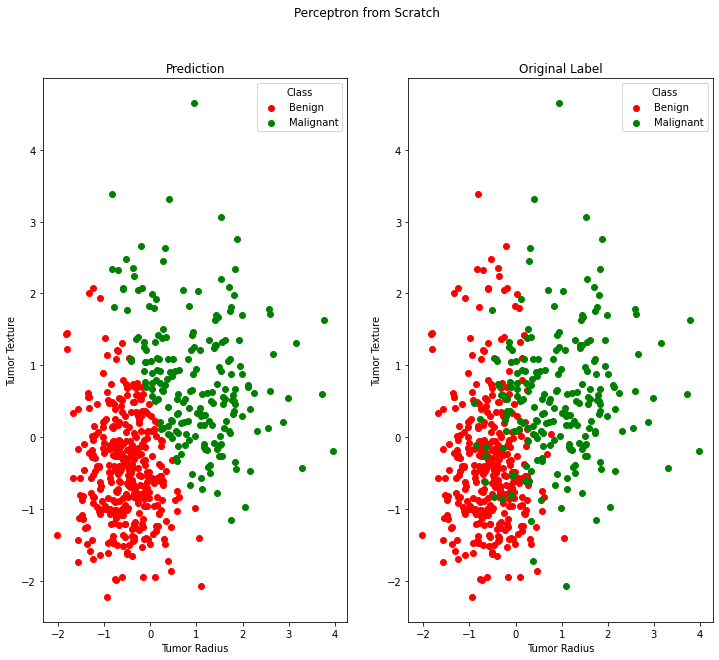

The perceptron using sklearn algorithm got classification error: 0.19859402460456943


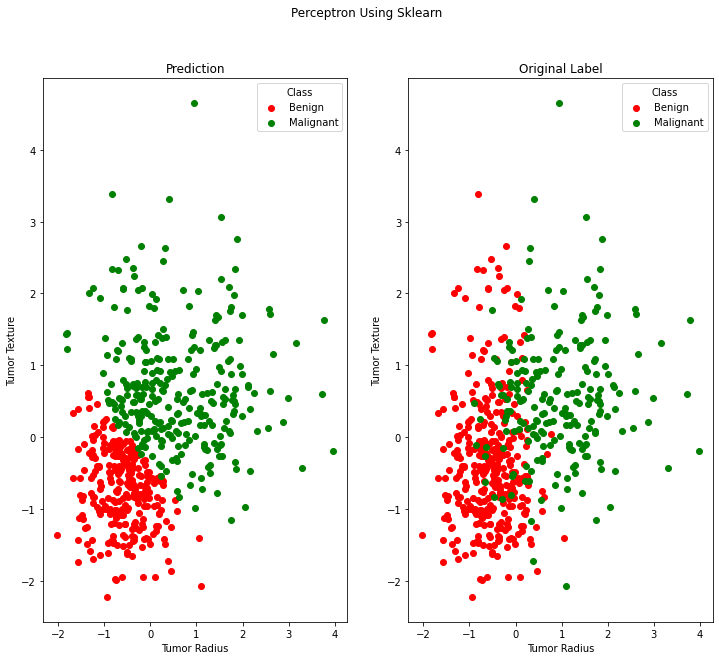

The SVM from scratch algorithm got classification error: 0.13181019332161686


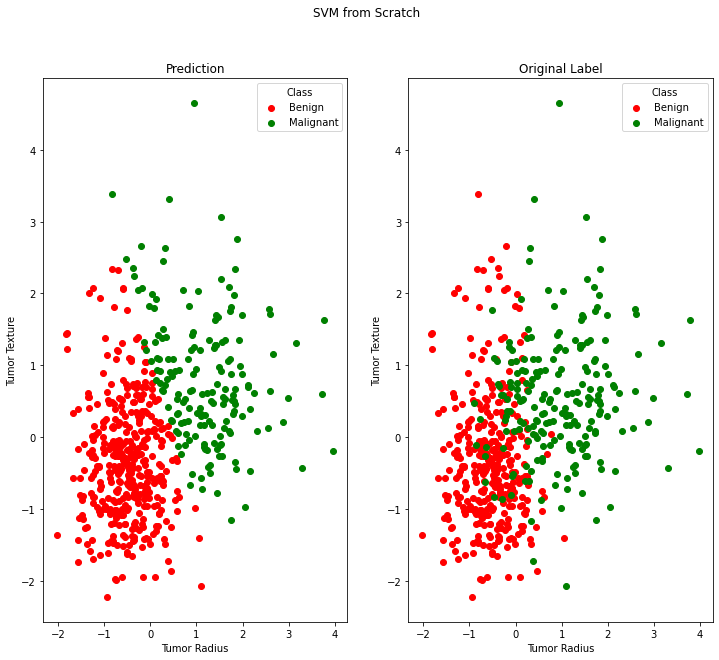

The SVM with linear kernel using sklearn algorithm got classification error: 0.11072056239015818


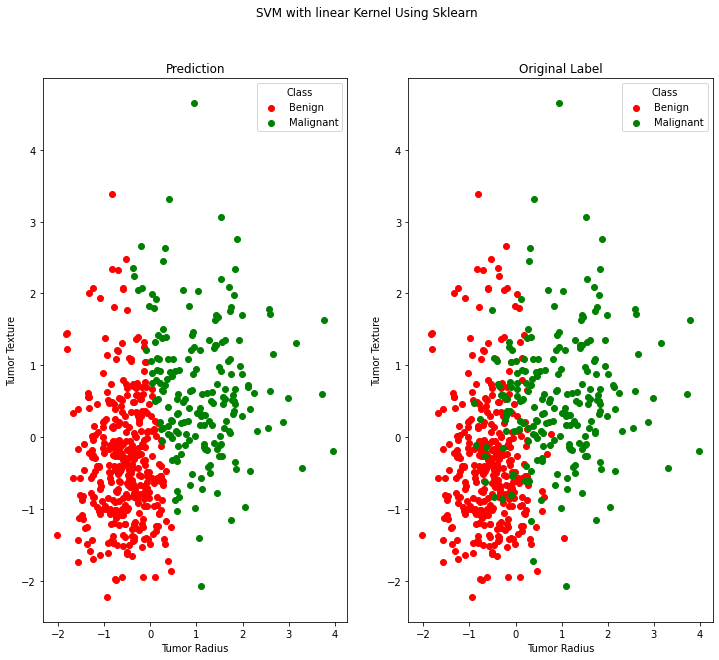

The SVM with rbf kernel using sklearn algorithm got classification error: 0.09314586994727592


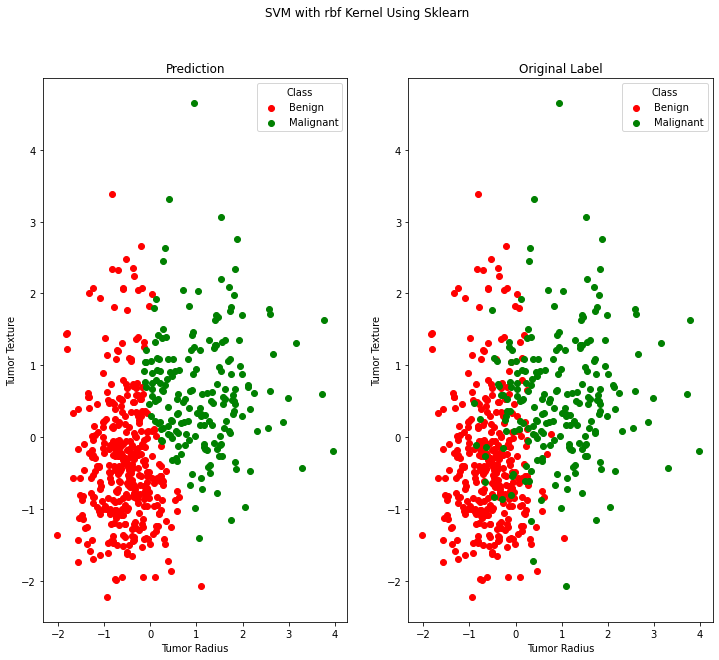

The kernel perceptron from scratch algorithm got classification error: 0.10896309314586995


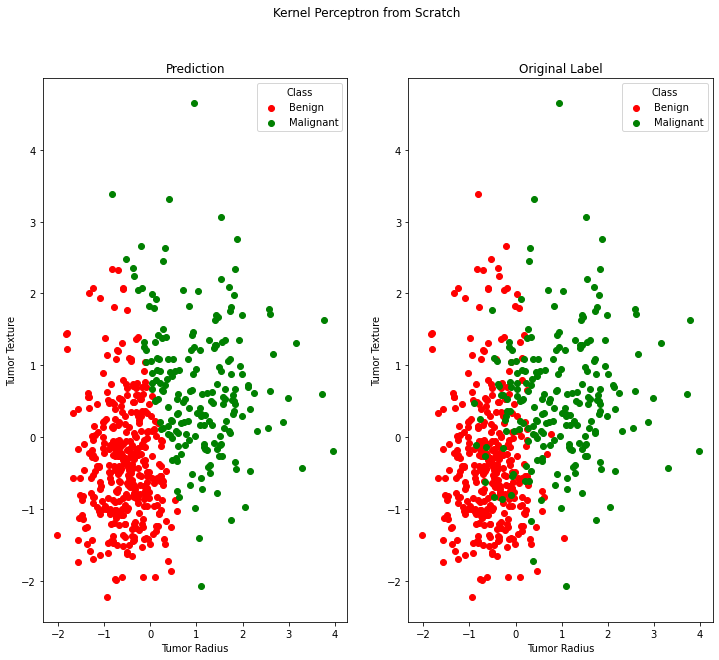

In [85]:
# Load the dataset
dataset, label=loadBreastCancer()
# Normalise the dataset to the same scale
dataset=standardScale(dataset)
# Add an extra column to the beginnning of the dataset
modifiedDataset=addColumn(dataset)
# Change every "0" to "-1" in the original label
label=modifyLabel(label)
# Only use "Tumor Radius" and "Tumor Texture" as input features
dataset=dataset[:, :2]
modifiedDataset=modifiedDataset[:, :3]

# Perceptron Algorithm from Scratch
perceptron(dataset=modifiedDataset, label=label, epoch=200)

# Perceptrom Algorithm Using Sklearn
perceptronSklearn(dataset=dataset, label=label)

# SVM from Scratch
SVM(dataset=modifiedDataset, label=label, epoch=200, learningRate=0.001, regularisationCoefficient=0.1)

# SVM Using Sklearn
SVMSklearn(dataset=dataset, label=label, kernel="linear")

# Kernel SVM Using Sklearn
SVMSklearn(dataset=dataset, label=label, kernel="rbf")

# Kernel Perceptron Algorithm from Scratch
kernelPerceptron(dataset=modifiedDataset, label=label, epoch=10, kernelFunction=polynomialKernel)

You could tune the model by modifying those hyperparameters like ***epoch, learning rate, regularisation coefficient, kernel choice*** and so on.

But generally we could see that:

1. Perceptrom algorithm is a very simple but efficient algorithm while the linear SVM algorithm would prefer those linear separable tasks.

2. Generally the non-linear classification algorithms could outperform the linear classification algorithms on the real dataset, as expected.

### 9. Cross Validation
You might wonder whether there are some convinient methods we could use to further improve the performance of the model or help us choose the hyperparameter.

A very common and powerful method is called the cross validation, which could be simply achieved by using the scikit-learn API.

Let's consider the follow graph:

1. First, you could divide the whole dataset into certain parts with the same size (we say 5 here).

2. You could then train the model by using different combination of those parts and test the model with the left one.

    This means that you are somehow use "different" training and test sets for each training process.

3. The final performance of the model is calculated by taking the average of all 5 training process.

By doing this, you could be more confident about the performance of the model and if you use different hyperparameters for each time, you can get an idea about how this hyperparameter would influence the model performace generally

![CrossValidation](https://miro.medium.com/max/1400/1*AAwIlHM8TpAVe4l2FihNUQ.png)


Here, we will use another method to implement the linear SVM with regularisation and try to find the best regularisation coefficient.

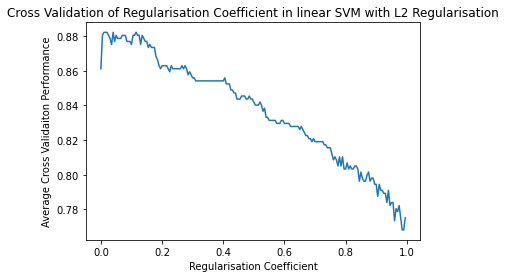

The linear SVM with l2 regularisation after cross validation algorithm got classification error: 0.12302284710017575


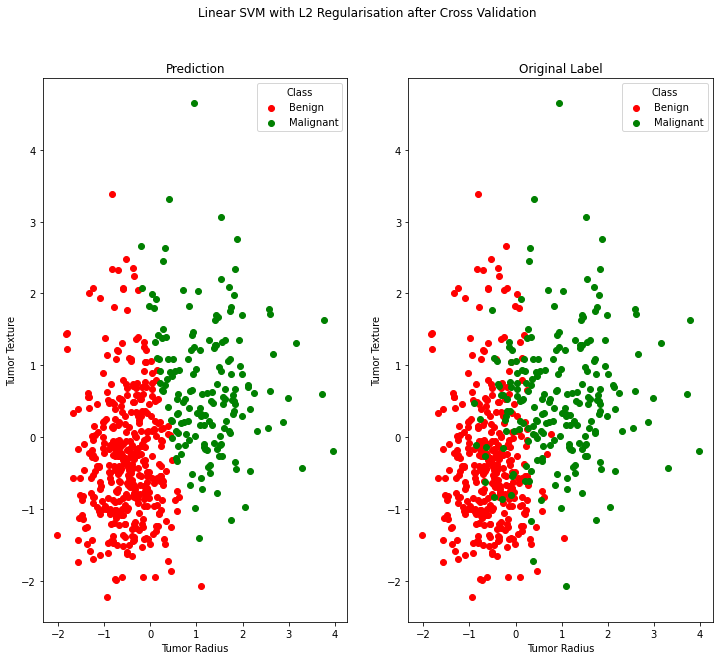

In [89]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Load the dataset
dataset, label=loadBreastCancer()
# Normalise the dataset to the same scale
dataset=standardScale(dataset)
# Change every "0" to "-1" in the original label
label=modifyLabel(label)
# Only use "Tumor Radius" and "Tumor Texture" as input features
dataset=dataset[:, :2]
# Here we declare a range of regularisation coefficient we are going to try
# np.arange() could be used to construct a sequence from the given min to the given max with constant interval
# For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.arange.html
coefficientRange=np.arange(1e-20, 1, 0.005)
# Record the performance for each regularisation coefficient
score=[]

# Go through all coefficients
for i in range(coefficientRange.shape[0]):
    # Construct a model using the current regularisation coefficient
    model=SGDClassifier(alpha=coefficientRange[i])
    # Find and record the mean of this model during the cross validation
    score.append(cross_val_score(model, dataset, np.ravel(label), cv=5).mean())

# We could plot the score against the regularisation coefficient
plt.plot(coefficientRange, score)
plt.xlabel("Regularisation Coefficient")
plt.ylabel("Average Cross Validaiton Performance")
plt.title("Cross Validation of Regularisation Coefficient in linear SVM with L2 Regularisation")
plt.show()

# Find the coefficient that could optimise our model
# np.argmax() could be used to find the index of the maximum value
# For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html?highlight=argmax#numpy.argmax
bestCoefficient=coefficientRange[np.argmax(score)]
# Construct the corresponding model and test its performance
model=SGDClassifier(alpha=bestCoefficient)
model.fit(dataset, np.ravel(label))

prediction=model.predict(dataset)
evaluate(prediction, label, "linear SVM with l2 regularisation after cross validation")
compare(dataset, prediction, label, "Linear SVM with L2 Regularisation after Cross Validation")

### 10. Summary
1. Classification is the problem to correctly predict the class of the given input data.

2. Supervised learning is the machine learning task to learn a mapping between the input featuers and the output and the goal is to ***generalise from the training data to accurately find the result for unseen data.***

3. We have seen lots of linear classification problems including the perceptron algorithm, SVM algorithm. Generally speaking:

    a. Perceptron algorithm is very simple and efficient, but I wouldn't recommand it as your firt trial when dealing with real-world datasets.

    b. Linear SVM prefers linear separable datasets.

4. Regularisation could be considered as a resistance for the model to perfectly fit the training data. This could be sued to solve the over-fitting problem.

5. These linear classification algorithms could be simply extended to non-linear versions by transforming them to a higher feature space and using the kernel trick. RBF kernel is always a good choice to start.

6. Cross Validation is a very powerful method which could help you tune hyperparameters and finally optimise your model.